In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from aux_functions.aux_plots import (plot_boxplot_histogram, plot_scatterplot, plot_distribution_actual_predicted)
from aux_functions.statistics import (test_pearson_correlation, apply_linear_regression, evaluate_linear_regression)
from aux_functions.mcmc_transformations import (import_dataset, transform_variables, pop_variable, convert_to_float, normalize_dataset)

%matplotlib inline


In [100]:
# Importing dataset
column_names = ['lenght_of_stay', 'age', 'infection_risk', 'routine_culturing_ratio', 'routine_xray_ratio', 'num_beds', 'med_school_affil', 'region', 'avg_census', 'num_nurses', 'avelbl_services']
columns_to_dummify = ['med_school_affil', 'region']
columns_to_apply_ln = ['num_nurses', 'num_beds', 'avg_census']
features = ['lenght_of_stay', 'age', 'routine_culturing_ratio', 'routine_xray_ratio', 'num_beds', 'med_school_affil', 'region', 'avg_census', 'num_nurses', 'avelbl_services']
target_variable = 'infection_risk'


### Linear model with all the data

In [101]:
def normalize_dataset_choose_cols(df, columns):
    df[columns] -= df[columns].mean()
    df[columns] /= df[columns].std()
    return df

In [102]:
df = import_dataset("data/dataset.txt", column_names)
df = transform_variables(df, columns_to_dummify, columns_to_apply_ln)
X, y = pop_variable(df, target_variable)
X = convert_to_float(X)
y = convert_to_float(y)
X = normalize_dataset(X)
df_to_fit = pd.concat([X, y], axis=1)

In [103]:

def apply_linear_regression_complete(df: pd.DataFrame, target: str) -> tuple:
    """
    Fits a Linear Regression model to the provided dataframe on the specified target variable.
    
    Parameters:
    df : pd.DataFrame
        The dataframe containing the dataset with features and target variable.
    target : str
        The name of the target variable in the dataframe.
    
    Returns:
    tuple
        A tuple containing the true values and the predicted values by the model.
    """
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in the dataframe.")

    y = df[target]
    x = df.drop(columns=[target])
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    LR = LinearRegression()
    LR.fit(x, y)
    y_prediction = LR.predict(x)
    
    return y, y_prediction, LR

In [104]:
y_test, y_prediction, LR = apply_linear_regression_complete(df_to_fit, 'infection_risk')

In [105]:
LR.intercept_

4.354867256637168

In [106]:
result_all_data = pd.DataFrame((list(zip(X.columns, np.round(LR.coef_, 2)))))
result_all_data.rename(columns={0: 'feature', 1: 'LSM'}, inplace=True)


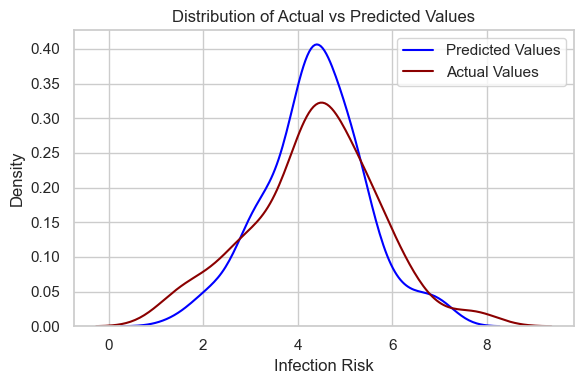

In [107]:
plot_distribution_actual_predicted(y_test, y_prediction)

### Linear model without outliers

In [108]:
df = import_dataset("data/dataset.txt", column_names)
df = transform_variables(df, columns_to_dummify, columns_to_apply_ln)
X, y = pop_variable(df, target_variable)
X = convert_to_float(X)
y = convert_to_float(y)
X = normalize_dataset(X)
df_to_fit = pd.concat([X, y], axis=1)

In [109]:
indexes_to_drop = [40, 93, 107, 53, 13, 54]
df_to_fit.drop(index=indexes_to_drop, inplace=True)
len(df_to_fit)

107

In [110]:
y_test, y_prediction, LR = apply_linear_regression_complete(df_to_fit, 'infection_risk')

In [111]:
LR.intercept_

4.333464002875968

In [112]:
result_without_outliers = pd.DataFrame((list(zip(X.columns, np.round(LR.coef_, 2)))))
result_without_outliers.rename(columns={0: 'feature', 1: 'LSM without outliers'}, inplace=True)

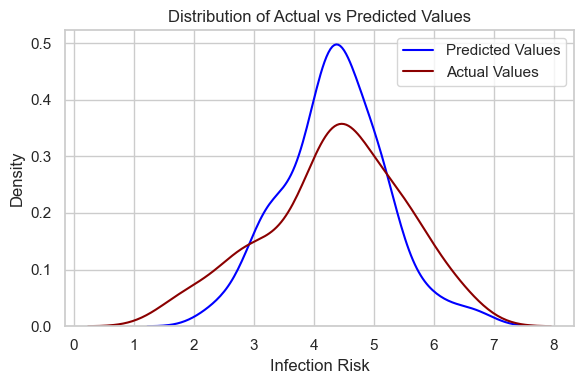

In [113]:
plot_distribution_actual_predicted(y_test, y_prediction)

In [114]:
merged_results = result_all_data.merge(result_without_outliers, on='feature', how='outer')

In [115]:
merged_results

,feature,LSM,LSM without outliers
0,lenght_of_stay,0.39,0.33
1,age,0.13,0.12
2,routine_culturing_ratio,0.52,0.42
3,routine_xray_ratio,0.20,0.18
4,avelbl_services,-0.09,-0.09
5,ln_num_nurses,0.68,0.56
6,ln_num_beds,-0.54,-0.80
7,ln_avg_census,0.49,0.82
8,med_school_affil_1,-0.10,-0.07
9,med_school_affil_2,0.10,0.07
